In [31]:
ls

 El volumen de la unidad C es Windows-SSD
 El n�mero de serie del volumen es: 30DB-825A

 Directorio de c:\Users\Arturo\Documents\MSC\Subjects\Probabilidad y Estad�stica

08/09/2023  10:25 a. m.    <DIR>          .
31/08/2023  01:09 p. m.    <DIR>          ..
08/09/2023  09:20 a. m.            23,873 Diabetes.csv
08/09/2023  09:19 a. m.            67,706 height_weight.csv
08/09/2023  09:26 a. m.                 0 RepresentacionDatos.py
08/09/2023  09:19 a. m.            18,750 tips.csv
08/09/2023  10:35 a. m.           879,319 U2T1 - Representacion de datos.ipynb
               5 archivos        989,648 bytes
               2 dirs  686,745,227,264 bytes libres


In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
dataset = pd.read_csv('tips.csv')
dataset.head()

,total_bill,tip,sex,smoker,day,time,size,price_per_person,Payer Name,CC Number,Payment ID
0,16.99,1.01,Female,No,Sun,Dinner,2,8.49,Christy Cunningham,3560325168603410,Sun2959
1,10.34,1.66,Male,No,Sun,Dinner,3,3.45,Douglas Tucker,4478071379779230,Sun4608
2,21.01,3.50,Male,No,Sun,Dinner,3,7.00,Travis Walters,6011812112971322,Sun4458
3,23.68,3.31,Male,No,Sun,Dinner,2,11.84,Nathaniel Harris,4676137647685994,Sun5260
4,24.59,3.61,Female,No,Sun,Dinner,4,6.15,Tonya Carter,4832732618637221,Sun2251


In [34]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   total_bill        244 non-null    float64
 1   tip               244 non-null    float64
 2   sex               244 non-null    object 
 3   smoker            244 non-null    object 
 4   day               244 non-null    object 
 5   time              244 non-null    object 
 6   size              244 non-null    int64  
 7   price_per_person  244 non-null    float64
 8   Payer Name        244 non-null    object 
 9   CC Number         244 non-null    int64  
 10  Payment ID        244 non-null    object 
dtypes: float64(3), int64(2), object(6)
memory usage: 21.1+ KB


In [35]:
dataset.drop(['Payer Name', 'CC Number', 'Payment ID'], axis = 1, inplace = True)
dataset.head()

,total_bill,tip,sex,smoker,day,time,size,price_per_person
0,16.99,1.01,Female,No,Sun,Dinner,2,8.49
1,10.34,1.66,Male,No,Sun,Dinner,3,3.45
2,21.01,3.50,Male,No,Sun,Dinner,3,7.00
3,23.68,3.31,Male,No,Sun,Dinner,2,11.84
4,24.59,3.61,Female,No,Sun,Dinner,4,6.15


In [36]:
dataset.isnull().sum()

total_bill          0
tip                 0
sex                 0
smoker              0
day                 0
time                0
size                0
price_per_person    0
dtype: int64

In [37]:
dataset.dropna()

,total_bill,tip,sex,smoker,day,time,size,price_per_person
0,16.99,1.01,Female,No,Sun,Dinner,2,8.49
1,10.34,1.66,Male,No,Sun,Dinner,3,3.45
2,21.01,3.50,Male,No,Sun,Dinner,3,7.00
3,23.68,3.31,Male,No,Sun,Dinner,2,11.84
4,24.59,3.61,Female,No,Sun,Dinner,4,6.15
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,9.68
240,27.18,2.00,Female,Yes,Sat,Dinner,2,13.59
241,22.67,2.00,Male,Yes,Sat,Dinner,2,11.34
242,17.82,1.75,Male,No,Sat,Dinner,2,8.91


In [38]:
dataset.fillna(0)

,total_bill,tip,sex,smoker,day,time,size,price_per_person
0,16.99,1.01,Female,No,Sun,Dinner,2,8.49
1,10.34,1.66,Male,No,Sun,Dinner,3,3.45
2,21.01,3.50,Male,No,Sun,Dinner,3,7.00
3,23.68,3.31,Male,No,Sun,Dinner,2,11.84
4,24.59,3.61,Female,No,Sun,Dinner,4,6.15
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,9.68
240,27.18,2.00,Female,Yes,Sat,Dinner,2,13.59
241,22.67,2.00,Male,Yes,Sat,Dinner,2,11.34
242,17.82,1.75,Male,No,Sat,Dinner,2,8.91


In [39]:
fabs = dataset['day'].value_counts()
fabs

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

In [40]:
data_day = pd.DataFrame()
data_day['fabs'] = fabs
data_day['fr'] = fabs/len(dataset)
data_day['frp'] = 100*fabs/len(dataset)
data_day['frpac'] = (100*fabs/len(dataset)).cumsum()
data_day.head()

,fabs,fr,frp,frpac
Sat,87,0.356557,35.655738,35.655738
Sun,76,0.311475,31.147541,66.803279
Thur,62,0.254098,25.409836,92.213115
Fri,19,0.077869,7.786885,100.000000


Tablas de distribucion de frecuencia

In [41]:
inter = pd.cut(dataset['total_bill'], 6).value_counts(sort = False)
inter

(3.022, 11.027]      32
(11.027, 18.983]    108
(18.983, 26.94]      59
(26.94, 34.897]      29
(34.897, 42.853]      9
(42.853, 50.81]       7
Name: total_bill, dtype: int64

In [42]:
data_total = pd.DataFrame()
data_total['fabs'] = inter
data_total['fr'] = inter/len(dataset)
data_total['frp'] = 100*inter/len(dataset)
data_total['frpac'] = (100*inter/len(dataset)).cumsum()
data_total.head()

,fabs,fr,frp,frpac
"(3.022, 11.027]",32,0.131148,13.114754,13.114754
"(11.027, 18.983]",108,0.442623,44.262295,57.377049
"(18.983, 26.94]",59,0.241803,24.180328,81.557377
"(26.94, 34.897]",29,0.118852,11.885246,93.442623
"(34.897, 42.853]",9,0.036885,3.688525,97.131148


##Gráficas##

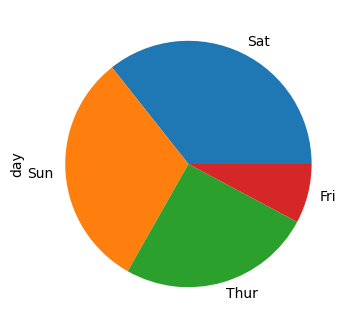

In [43]:
dataset['day'].value_counts().plot(kind = 'pie', figsize = (8,4));

In [44]:
plt.figure(figsize = (6,6))
plt.pie(dataset['day'].value_counts(), labels = dataset['day'].unique(), 
        colors = sns.color_palette('husl', 9), eplode = [1, 0, 0, 0], autopct = '%1.1f%%')
plt.show();

TypeError: pie() got an unexpected keyword argument 'eplode'

<Figure size 600x600 with 0 Axes>

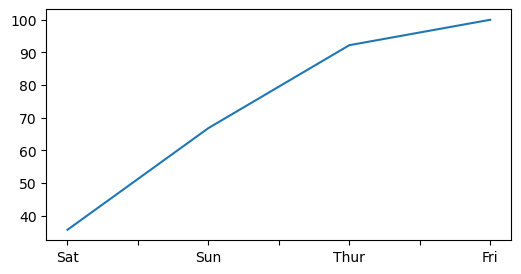

In [ ]:
data_day['frpac'].plot.line(figsize = (6,3));

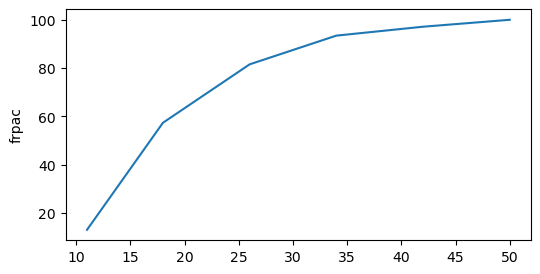

In [ ]:
plt.figure(figsize = (6,3))
sns.lineplot(x = [11, 18, 26, 34, 42, 50], y = 'frpac', data = data_total)
plt.show();

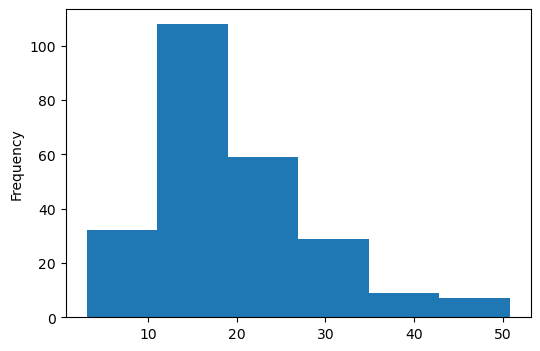

In [ ]:
dataset['total_bill'].plot.hist(bins = 6, figsize = (6, 4));

<AxesSubplot:xlabel='total_bill', ylabel='Count'>

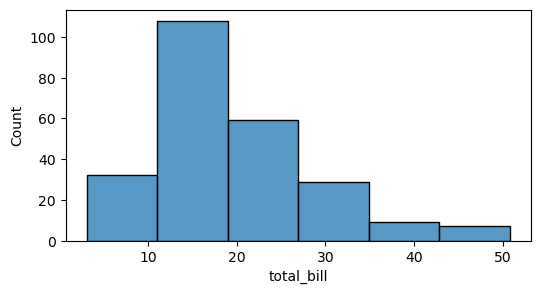

In [ ]:
plt.figure(figsize = (6, 3))
sns.histplot(x = 'total_bill', bins = 6, data = dataset)

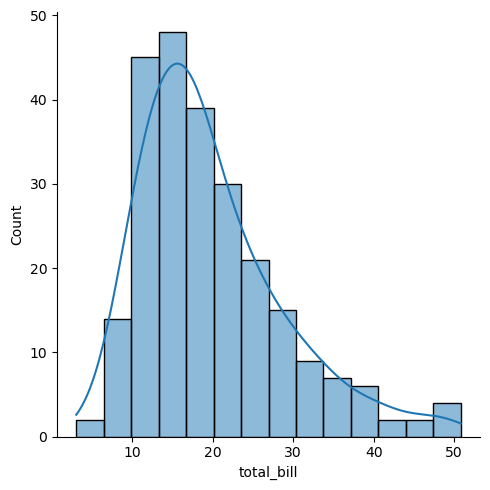

In [ ]:
sns.displot(x = 'total_bill', data = dataset, kde = True)

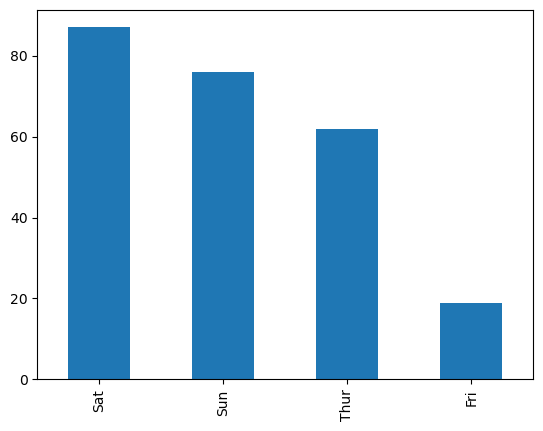

In [ ]:
data_day['fabs'].plot.bar();

<AxesSubplot:>

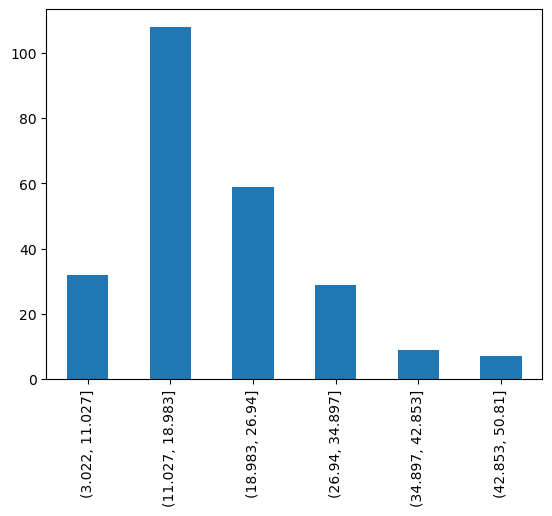

In [ ]:
data_total['fabs'].plot.bar()

<AxesSubplot:ylabel='fabs'>

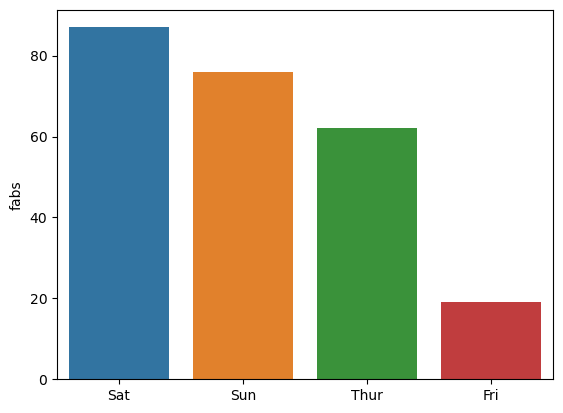

In [ ]:
sns.barplot(x = data_day.index, y = 'fabs', data = data_day)

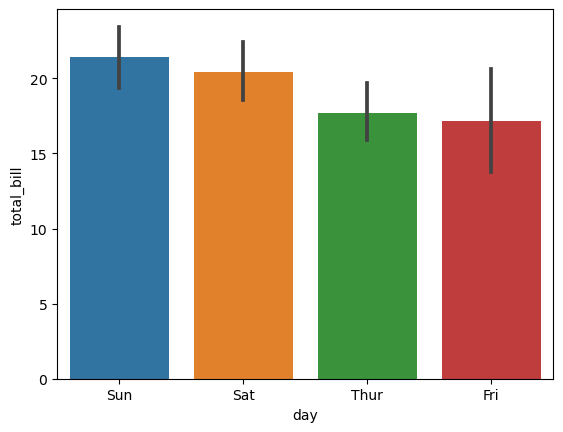

In [ ]:
sns.barplot(x = 'day', y = 'total_bill', data = dataset);

Graficas

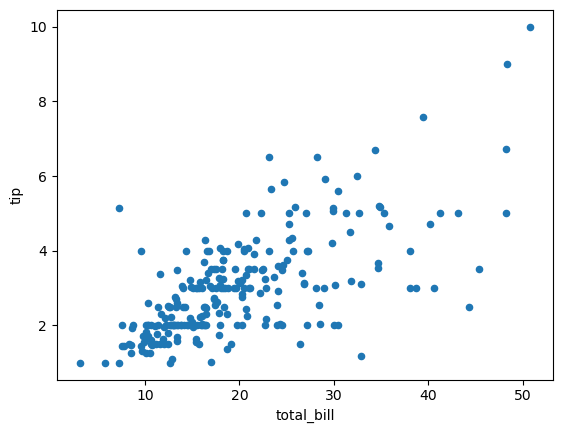

In [ ]:
dataset.plot.scatter(x = 'total_bill', y = 'tip');

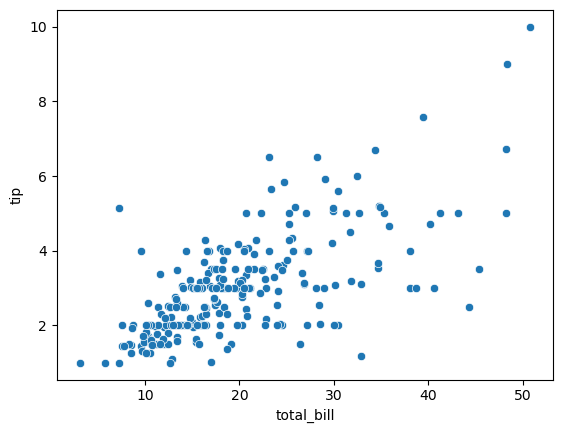

In [ ]:
sns.scatterplot(x = 'total_bill', y = 'tip', data = dataset);

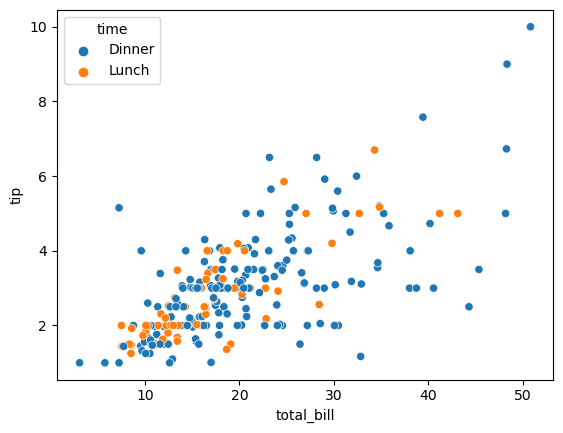

In [ ]:
sns.scatterplot(x = 'total_bill', y = 'tip', hue = 'time', data = dataset);

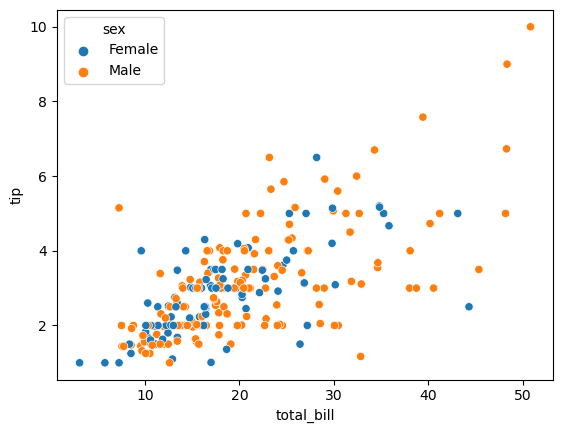

In [ ]:
sns.scatterplot(x = 'total_bill', y = 'tip', hue = 'sex', data = dataset);

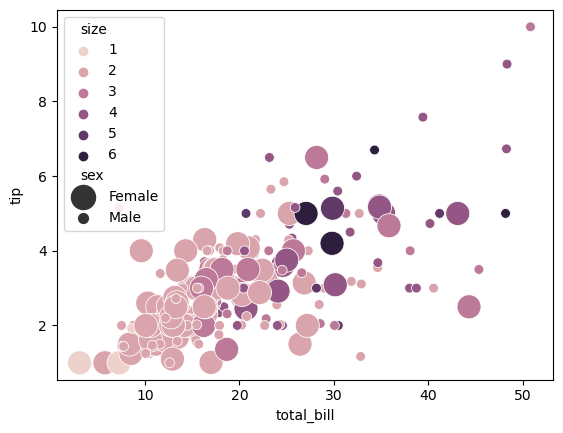

In [ ]:
sns.scatterplot(x = 'total_bill', y = 'tip', hue = 'size', size = 'sex', data = dataset, sizes =(50, 300));

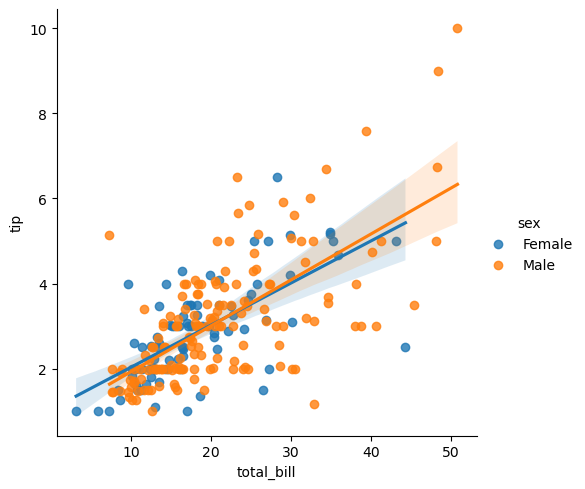

In [45]:
sns.lmplot(x = 'total_bill', y = 'tip', hue = 'sex', data = dataset);

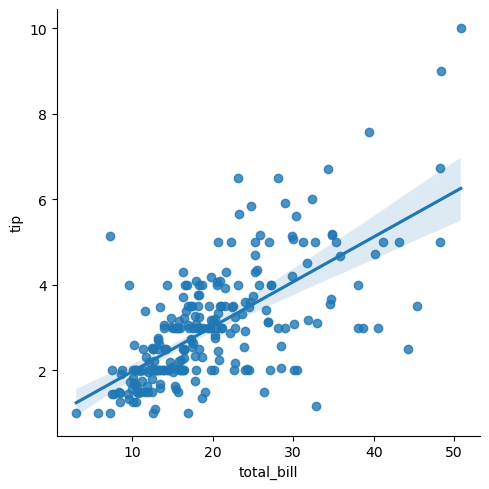

In [ ]:
sns.lmplot(x = 'total_bill', y = 'tip', data = dataset);

Matriz de dispersion

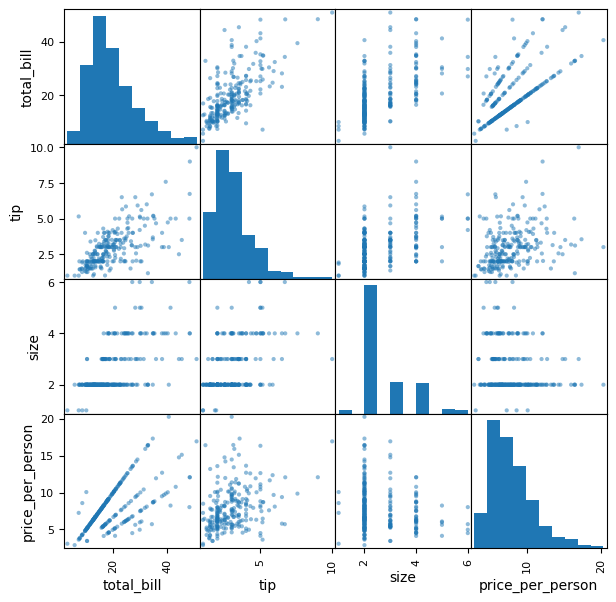

In [ ]:
pd.plotting.scatter_matrix(dataset, figsize = (7,7));

In [ ]:
dataset['sex'].replace('Male', 1, inplace = True)
dataset['sex'].replace('Female', 0, inplace = True)
dataset.head()

,total_bill,tip,sex,smoker,day,time,size,price_per_person
0,16.99,1.01,0,No,Sun,Dinner,2,8.49
1,10.34,1.66,1,No,Sun,Dinner,3,3.45
2,21.01,3.50,1,No,Sun,Dinner,3,7.00
3,23.68,3.31,1,No,Sun,Dinner,2,11.84
4,24.59,3.61,0,No,Sun,Dinner,4,6.15


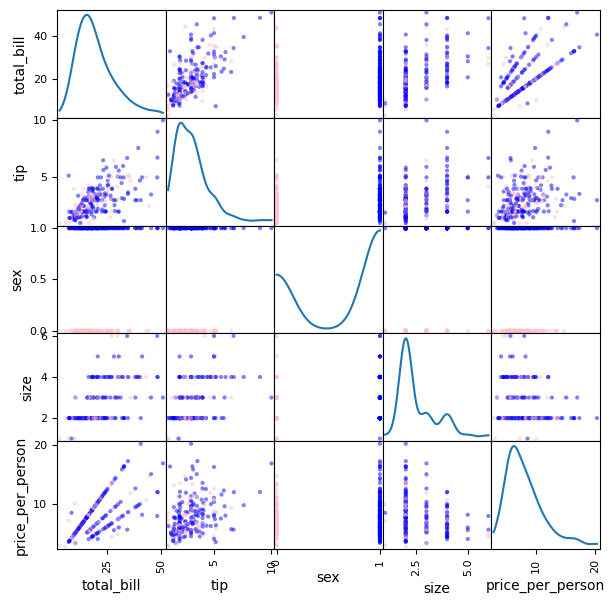

In [ ]:
colors = dataset['sex'].map(lambda x: 'blue' if x else 'pink')
pd.plotting.scatter_matrix(dataset, figsize = (7,7), color = colors, diagonal = 'kde');

<AxesSubplot:>

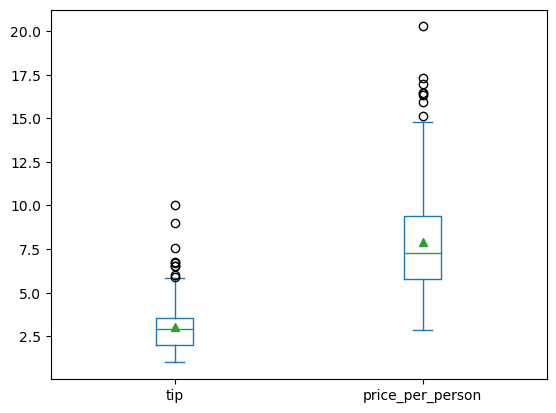

In [ ]:
dataset[['tip', 'price_per_person']].plot.box(showmeans = True)

<AxesSubplot:xlabel='tip'>

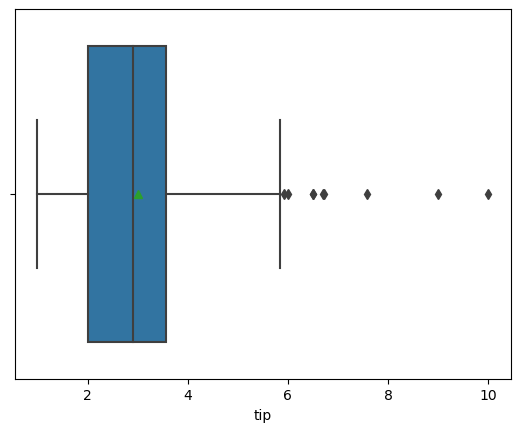

In [ ]:
sns.boxplot(x = dataset['tip'], showmeans = True)

<AxesSubplot:ylabel='tip'>

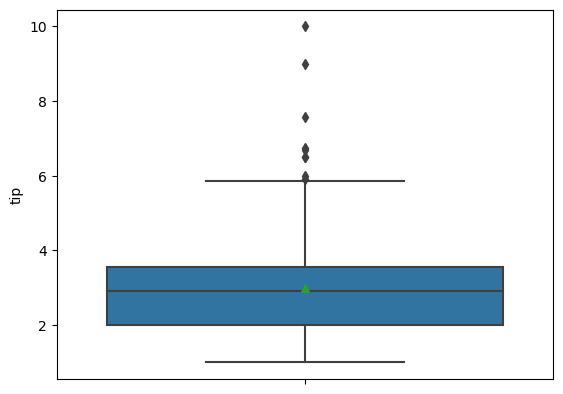

In [ ]:
sns.boxplot(y = dataset['tip'], showmeans = True)


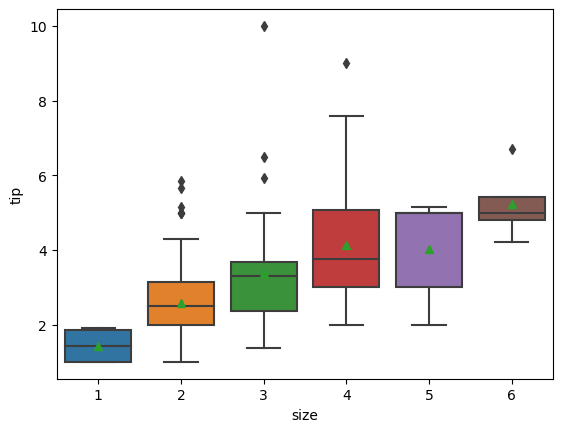

In [ ]:
sns.boxplot(x = 'size', y = 'tip', data = dataset, showmeans = True);

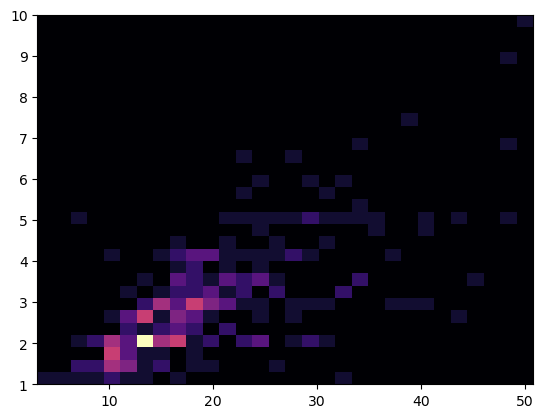

In [ ]:
plt.hist2d(dataset['total_bill'], dataset['tip'], bins = 30, cmap = 'magma')
plt.show();

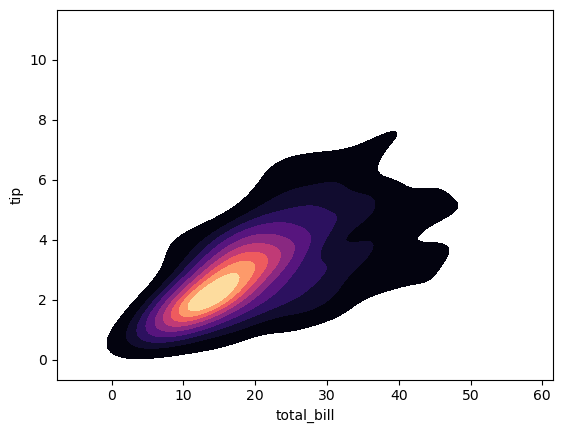

In [ ]:
sns.kdeplot(data = dataset, x = 'total_bill', y = 'tip', cmap = 'magma', fill = True);